In [1]:
# Always good to set a seed for reproducibility
import numpy as np 
SEED=seed = 1234
np.random.seed(seed)

# 데이터불러오기

### 함수 정의

In [2]:
import pandas as pd
def load_dataset(mode):
    data = pd.read_pickle('../input/diaBTS.pkl')
    
    if mode == 1:
        X = data['1Y(0-0 vs 0-1)'].iloc[:,1:]
        y = data['1Y(0-0 vs 0-1)'].label

    elif mode == 2:       
        X = data['2Y(0-0 vs 0-1)'].iloc[:,1:]
        y = data['2Y(0-0 vs 0-1)'].label    
    
    elif mode == 3:       
        X = data['1Y(1-1 vs 1-2)'].iloc[:,1:]
        y = data['1Y(1-1 vs 1-2)'].label    
    
    elif mode == 4:       
        X = data['2Y(1-1 vs 1-2)'].iloc[:,1:]
        y = data['2Y(1-1 vs 1-2)'].label  
        
    elif mode == 5:
        X = data['Total(0-0 vs 0-1)'].iloc[:,1:]
        y = data['Total(0-0 vs 0-1)'].label

    elif mode == 6:       
        X = data['Total(1-1 vs 1-2)'].iloc[:,1:]
        y = data['Total(1-1 vs 1-2)'].label  
    else:
        return
    
    return X,y, data

### 실행

In [3]:
X, y, data = load_dataset(mode = 6)

### 결과(1)

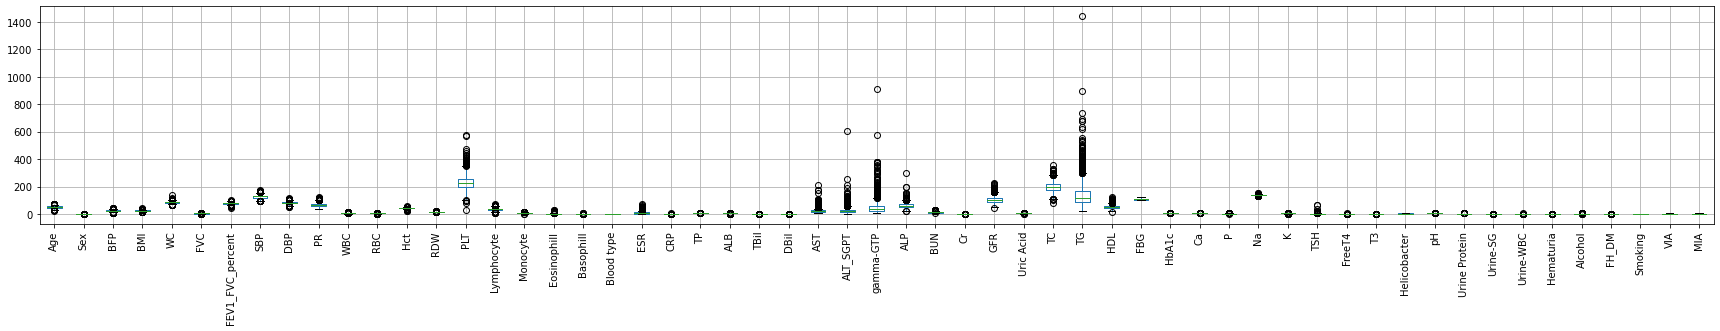

In [4]:
import matplotlib.pyplot as plt
X.boxplot(figsize=(30,4))
plt.xticks(rotation=90)
plt.show()

### 결과(2)

In [5]:
X.describe()

,Age,Sex,BFP,BMI,WC,FVC,FEV1_FVC_percent,SBP,DBP,PR,...,pH,Urine Protein,Urine-SG,Urine-WBC,Hematuria,Alcohol,FH_DM,Smoking,VIA,MIA
count,2429.000000,2429.000000,2429.000000,2429.000000,2428.000000,2418.000000,2418.000000,2429.000000,2429.000000,2429.000000,...,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2428.000000,2429.000000,2429.000000,2429.000000,2429.000000
mean,50.142034,0.100453,24.423672,24.874516,86.830725,4.232155,79.141853,127.412927,81.630301,68.876492,...,5.982688,1.371393,0.119538,0.037923,0.033800,1.637974,0.148209,1.982297,1.778098,1.966653
std,6.425341,0.300665,4.953418,2.742141,6.915549,0.724138,5.462792,11.019094,8.052290,12.094135,...,0.686174,0.605941,0.324488,0.283215,0.221735,1.226473,0.355380,0.775510,1.867677,1.923827
min,23.000000,0.000000,5.200000,16.700000,65.000000,1.520000,43.000000,94.000000,52.000000,39.000000,...,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,46.000000,0.000000,21.200000,23.100000,82.400000,3.812500,76.000000,120.000000,77.000000,60.000000,...,5.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,51.000000,0.000000,24.400000,24.700000,86.500000,4.260000,80.000000,128.000000,82.000000,67.000000,...,5.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,55.000000,0.000000,27.300000,26.500000,91.000000,4.700000,83.000000,135.000000,87.000000,76.000000,...,6.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000
max,74.000000,1.000000,45.000000,47.200000,140.500000,7.660000,99.000000,172.000000,115.000000,121.000000,...,8.500000,5.000000,1.000000,4.000000,2.000000,4.000000,1.000000,3.000000,7.000000,7.000000


# 전처리부

## 정규화

### 개요

숫자 데이터의 각 변수는 그 특성에 따라 수의 범위, 분산 등이 천차만별이다.  
가령, 분석을 진행할 당뇨 데이터 에서는 FBG(공복혈당) 변수를 가장 중요한 변수 중 하나로 꼽을 수 있는데, 44 ~ 125 정도의 범위를 갖는다.  
반면 TG(triglyceride) 라는 변수는 FBG에 비해서는 중요도가 상대적으로 떨어진다 볼 수 있지만 17 ~ 1510 으로 넓은 폭의 범위를 가진다.  
이 경우 별다른 조치를 취하지 않을 경우 후술할 kNN, SVM 등 알고리즘에서 샘플 사이의 유사한 정도를 측정할 때 다른 변수는 신경쓰지 않고 무조건 TG가 비슷한 것만을 유사하다고 잘못 결론 내릴 수 있다.  
따라서 **모든 변수를 일정한 값 범위로 맞춰주**는 **정규화(normalization)** 는 대부분의 모델을 적용하기 위해 필수적으로 선행되어야 한다.  

> Random forest 등의 tree 기반 모델은 비교적 이러한 제한이 덜하다.  

이번 분석에서는 가장 간단한 정규화 방법 중 하나인 **MinMax scaling** 정규화를 진행하였다.  
MinMax scaling은 각 변수를 배수 관계가 그대로 유지되도록 0~1사이의 값으로 모두 통일시켜주는 방법이다.  
Minmax scaling 이후에도 변수별 분산이 다르면 여전히 실제 중요도와 상관 없이 분산에 의존하여 변수의 중요도가 결정될 위험이 있다.
하지만 그 차이가 매우 크지 않고 방법이 간단하기 때문에 minmax scaling은 아직까지도 많이 사용되는 정규화 방법이다.  


### 함수정의

In [6]:
from sklearn.preprocessing import MinMaxScaler
def scale(mode, x):
    if mode == 'minmax':
        scaler = MinMaxScaler()
        x[:] = scaler.fit_transform(x.values)
    return x

### 실행

In [7]:
X = scale(mode = 'minmax', x = X)

### 결과(1)

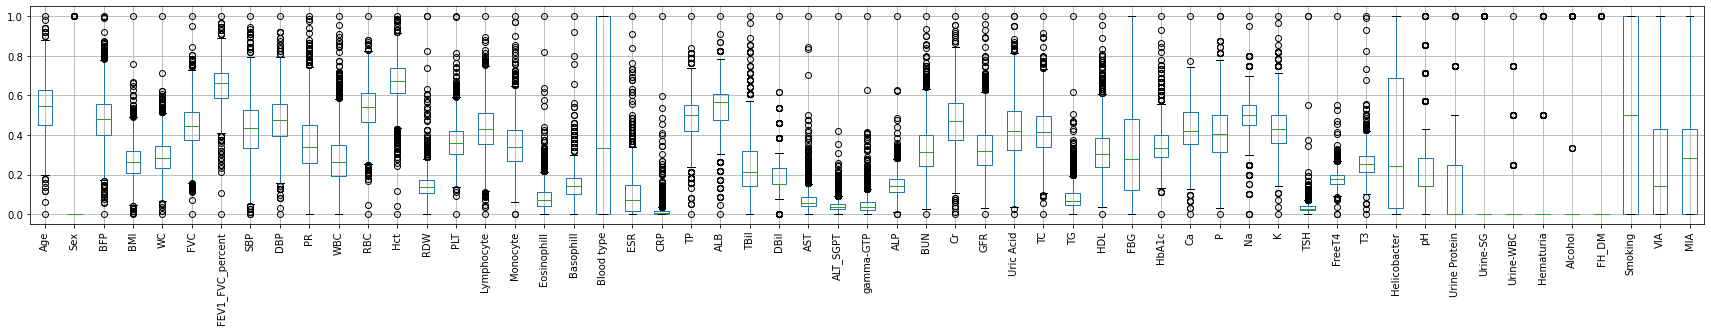

In [8]:
import matplotlib.pyplot as plt
X.boxplot(figsize=(30,4))
plt.xticks(rotation=90)
plt.show()

### 결과(2)

In [9]:
X.describe()

,Age,Sex,BFP,BMI,WC,FVC,FEV1_FVC_percent,SBP,DBP,PR,...,pH,Urine Protein,Urine-SG,Urine-WBC,Hematuria,Alcohol,FH_DM,Smoking,VIA,MIA
count,2429.000000,2429.000000,2429.000000,2429.000000,2428.000000,2418.000000,2418.000000,2429.000000,2429.000000,2429.000000,...,2426.000000,2426.000000,2426.000000,2426.000000,2426.000000,2428.000000,2429.000000,2429.000000,2429.000000,2429.000000
mean,0.532197,0.100453,0.483007,0.268017,0.289149,0.441719,0.645390,0.428371,0.470322,0.364347,...,0.280768,0.092848,0.119538,0.009481,0.016900,0.212658,0.148209,0.491149,0.254014,0.280950
std,0.125987,0.300665,0.124458,0.089906,0.091597,0.117938,0.097550,0.141270,0.127814,0.147489,...,0.196050,0.151485,0.324488,0.070804,0.110867,0.408824,0.355380,0.387755,0.266811,0.274832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450980,0.000000,0.402010,0.209836,0.230464,0.373371,0.589286,0.333333,0.396825,0.256098,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.549020,0.000000,0.482412,0.262295,0.284768,0.446254,0.660714,0.435897,0.476190,0.341463,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.142857,0.285714
75%,0.627451,0.000000,0.555276,0.321311,0.344371,0.517915,0.714286,0.525641,0.555556,0.451220,...,0.285714,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.428571,0.428571
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 결측값 처리

### 개요

데이터를 다루다보면 간헐적으로 개별 값이 **누락**된 경우를 접할 수 있다.  
![a](img/결측값.PNG)  

이렇게 데이터가 누락된 부분을 **결측 값**이라고 한다. 
결측값은 작업자의 실수, 기계의 결함 등 다양한 이유로 발생한다.  
  
대부분의 머신러닝 기법은 수학적 계산을 위해 변수가 숫자형 변수여야 사용이 가능하다.  
비정형 데이터와 같이 숫자형 변수가 아닌 변수를 사용할 때도 숫자로 어떻게든 변형시켜서 사용하곤 한다.  
결측값이 포함된 데이터를 다루는 경우도 마찬가지다.  
결측값이 포함된 경우 데이터 분석이 불가능하기 때문에 **보간법** 혹은 **제거법** 중 하나를 사용해서, 혹은 둘 모두를 사용해 결측값을 처리해주어야한다.  
  
**제거법**은 결측값이 포함된 열 혹은 행이 잘못 수집된 데이터라고 판단하여 아예 제거한 후 데이터에 결측값이 남아있지 않도록 처리하는 방법이다.  
**보간법**은 데이터가 손실되지 않도록, 결측이 있는 부분만 다른 데이터를 참고해 적절한 값으로 채워넣어 처리하는 방법이다.  
  
본 연구에서 **당뇨** 데이터에 존재하는 결측값을 처리한 방법은 이 중에서 **보간법**이며 **kNN(k - nearest neighbors) imputer** 알고리즘을 사용했다.   

![b](img/knn.PNG)  

**kNN imputer** 알고리즘은 kNN regressor 를 활용해 결측값 부분을 예측해 채워 넣는 방식이며 다음 단계로 진행된다.  
1. 데이터에서 결측값이 있는 샘플을 모두 뽑는다.
2. 각 샘플에서 결측값이 있는 변수를 제외한 후 나머지 변수를 활용해 전체 데이터 샘플에서 **직선거리**가 가장 가까운 k개의 샘플을 선별한다.
3. k개의 샘플에서 결측값이 있는 변수의 값을 추출하고, **평균 값**을 계산해 결측값을 대체한다.  

이때 사용자의 판단에 따라 직선거리 대신 마할라노비스 거리 등 다른 거리 척도를 사용하기도 하고, 평균 값 대신 가중 평균 등을 사용할 수도 있다.

### 함수정의

[link_kNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)  
위 scikt learn의 KNNImputer 클래스 정의 document를 참고해 KNNImputer의 파라미터 입력 값들을 원하는대로 수정해 사용할 수 있다.  

In [10]:
from sklearn.impute import KNNImputer
def impute(mode, x):
    if mode == 'knn':
        imputer = KNNImputer(n_neighbors=5)
        x = pd.DataFrame(imputer.fit_transform(x), columns = x.columns)
    return x


### 실행

In [11]:
X = impute(mode = 'knn', x = X)

### 결과(1)

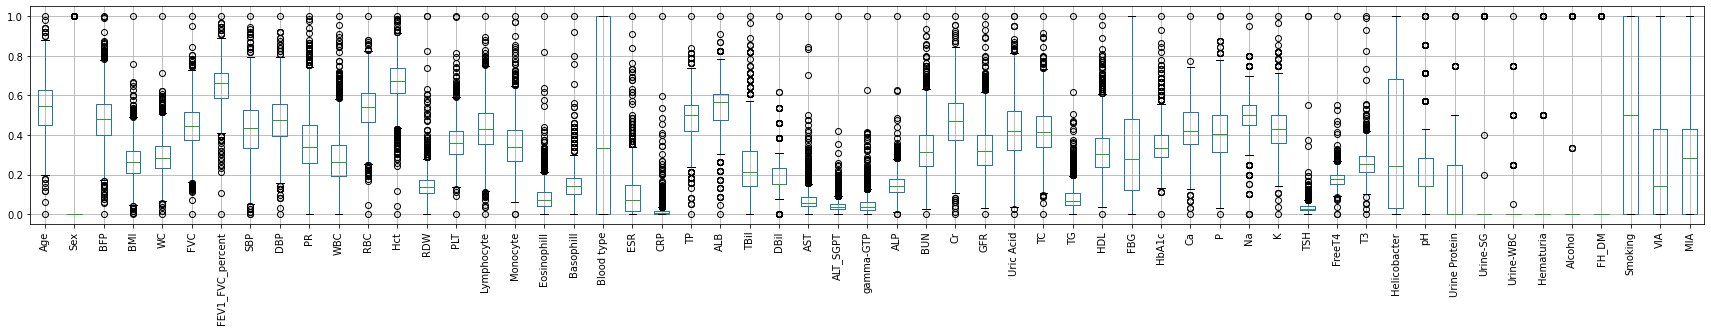

In [12]:
import matplotlib.pyplot as plt
X.boxplot(figsize=(30,4))
plt.xticks(rotation=90)
plt.show()

### 결과(2)

In [13]:
X.describe()

,Age,Sex,BFP,BMI,WC,FVC,FEV1_FVC_percent,SBP,DBP,PR,...,pH,Urine Protein,Urine-SG,Urine-WBC,Hematuria,Alcohol,FH_DM,Smoking,VIA,MIA
count,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,...,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000
mean,0.532197,0.100453,0.483007,0.268017,0.289127,0.441638,0.645435,0.428371,0.470322,0.364347,...,0.280809,0.092837,0.119638,0.009490,0.016879,0.212570,0.148209,0.491149,0.254014,0.280950
std,0.125987,0.300665,0.124458,0.089906,0.091584,0.117804,0.097355,0.141270,0.127814,0.147489,...,0.195944,0.151394,0.324350,0.070765,0.110800,0.408763,0.355380,0.387755,0.266811,0.274832
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.450980,0.000000,0.402010,0.209836,0.230464,0.374593,0.589286,0.333333,0.396825,0.256098,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.549020,0.000000,0.482412,0.262295,0.284768,0.446254,0.660714,0.435897,0.476190,0.341463,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.142857,0.285714
75%,0.627451,0.000000,0.555276,0.321311,0.344371,0.517915,0.714286,0.525641,0.555556,0.451220,...,0.285714,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.428571,0.428571
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## train test split  

### 개요

머신러닝은 기본적으로 주어진 데이터에서 가장 예측을 잘하는 파라미터를 기계가 스스로 탐색하는 것이다.  
때문에 어느 모델을 활용하든 학습에 사용한 데이터 상에서는 예측 성능이 실제 적용할 때에 비해 과적합될 수 밖에 없다.  
하여 학습된 모델의 성능을 실제 적용할 때와 최대한 비슷하게 객관적으로 평가하기 위해서는 **학습에 전혀 사용되지 않는** 평가용 데이터 셋을 미리 준비해두어야 한다.  
  
순서가 상관이 없는 데이터라면 보통 **무작위 추출**을 통해 평가용 데이터 셋을 추출한다.  
하지만 확보한 데이터의 개수가 적고 예측 값이 불균형하게 존재하는 경우 성능 평가에 왜곡이 발생할 수 있다.  
무작위 추출을 할 때마다 평가용 데이터 셋에 있는 당뇨환자의 비율이 큰 폭으로 바뀔 수 있기 때문이다.  
때문에 실험의 횟수를 늘려 평균적인 성능을 측정해야하는데, 이때 각 시도의 결과 안정성을 높여줄 수 있는 것이 **계층적 샘플링** 방법이다.  
**계층적 샘플링**은 y 값(예측값)에 따라 데이터를 분리 시키고, y값의 비율이 유지되도록 샘플링을 진행하는 방식이다.  
이 경우 y값에 따라 성능 측정이 왜곡되는 현상이 없어 조금 더 안정적으로 실험을 진행할 수 있게 된다.  


### 실행

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                           test_size=0.2,
                                           stratify=y, random_state = SEED)

In [17]:
X_train

,Age,Sex,BFP,BMI,WC,FVC,FEV1_FVC_percent,SBP,DBP,PR,...,pH,Urine Protein,Urine-SG,Urine-WBC,Hematuria,Alcohol,FH_DM,Smoking,VIA,MIA
126,0.450980,0.0,0.555276,0.422951,0.470199,0.529316,0.821429,0.333333,0.380952,0.317073,...,0.142857,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.142857,0.142857
766,0.666667,0.0,0.628141,0.331148,0.430464,0.429967,0.732143,0.282051,0.587302,0.243902,...,0.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.5,0.285714,0.428571
679,0.490196,0.0,0.575377,0.400000,0.370861,0.431596,0.732143,0.435897,0.539683,0.134146,...,0.142857,0.00,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.000000
133,0.666667,0.0,0.364322,0.170492,0.192053,0.607492,0.482143,0.474359,0.476190,0.365854,...,0.285714,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.857143,1.000000
1633,0.411765,0.0,0.256281,0.232787,0.164238,0.412052,0.642857,0.500000,0.539683,0.231707,...,0.714286,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0.431373,0.0,0.515075,0.249180,0.284768,0.425081,0.732143,0.307692,0.603175,0.353659,...,0.142857,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.142857
2419,0.647059,0.0,0.419598,0.193443,0.211921,0.491857,0.607143,0.525641,0.476190,0.487805,...,0.142857,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857
785,0.333333,1.0,0.675879,0.259016,0.168212,0.278502,0.732143,0.307692,0.460317,0.304878,...,0.571429,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000
2051,0.568627,1.0,0.663317,0.285246,0.316556,0.221498,0.660714,0.205128,0.285714,0.365854,...,0.142857,0.25,1.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.000000


In [23]:
sum(y_train)

337

# 학습부  
> 학습 모델을 선언하고 각 모델별 최적의 하이퍼파라미터를 탐색

## 모델 튜닝 최적화

### 개요

#### 그리드 서치를 활용한 최적의 하이퍼파라미터 탐색
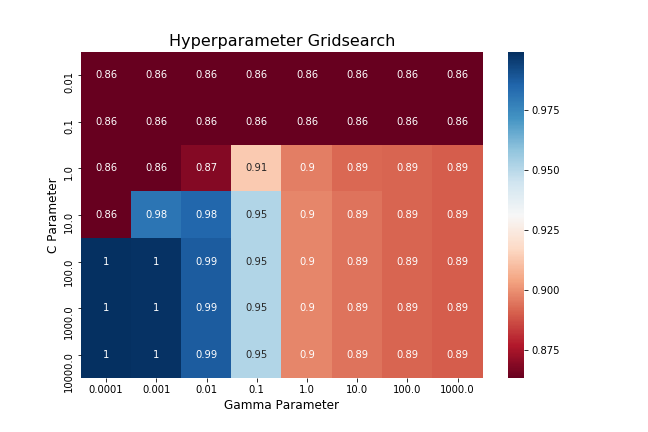 <br>
**그리드 서치(Grid search)**

&nbsp;&nbsp;모델 학습을 진행할 때, 우수한 성능을 가진 분류 모델을 얻기 위해서는 학습 기법 별로 여러가지 파라미터들을 조정해야 합니다. <br>
사용되는 데이터에 적합한 최적의 파라미터를 탐색해야 하는데, 일반적으로 이를 학습 이전에 정확하게 파악하기에는 어렵습니다. <br>
따라서 파라미터를 변경해가며 얻어진 결과물 성능을 비교함으로써 경험적으로 찾아내야 합니다. <br>
그리드 서치란 그림과 같이 범위 내의 파라미터들의 모든 조합들을 테스트해서 가장 좋은 성능을 내는 파라미터들을 찾아내는 기법입니다. <br>
각각의 기법에 따라 그리드 서치를 통해 탐색할 파라미터와 그 범위를 설정해주면, 순차적으로 입력하여 학습을 진행하고 모델 성능을 비교합니다. <br>
이렇게 그리드 서치를 통하여 가장 우수한 모델 성능을 얻어낼 수 있는 최적의 파라미터를 도출할 수 있습니다.  <br>
그리드 서치를 진행할 파라미터 별 후보군의 개수를 모두 곱한 횟수만큼 모델 학습을 진행하기 때문에, 최적의 조합을 찾을 때까지 연산 시간이 매우 늘어나는 단점이 있습니다. <br>
특히, 모델 학습 시간이 오래 걸리는 기법의 경우 사용에 주의하여야 합니다.<br>


&nbsp;&nbsp;이 레시피에서 사용한 함수는 scikit-learn의 GridSearchCV로 앞서 이야기한 그리드 서치를 통한 하이퍼 파라미터 튜닝과 교차 검증(Cross-validation)을 동시에 진행하는 함수입니다. <br>
지정된 파라미터들을 순차적으로 적용하며 교차 검증(Cross-validation)을 진행하여 최적의 파라미터를 탐색하게 됩니다. 
-------------------------------
**설정 파라미터**
- **scoring** : 모델 비교를 위하여 예측 성능을 측정할 평가 방법을 지정합니다. AUC score를 사용합니다. 
- **cv** : 교차 검증을 위하여 분할되는 학습/테스트 세트의 개수 지정합니다. Cv는 5를 사용하여 5-fold cross-validation을 진행합니다. 
- **refit** : 최적의 하이퍼 파라미터 조합을 찾은 후 해당 하이퍼 파라미터로 재학습을 진행할 것인지 여부를 지정합니다. 


#### 교차 검증(Cross validation)
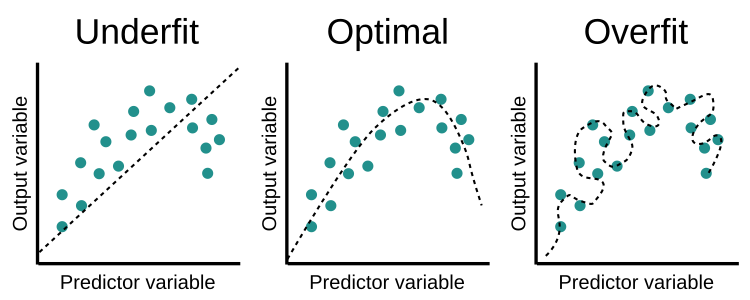 <출처: educative.io> <br>
**교차 검증(Cross validation)**<br>

&nbsp;&nbsp;모델 학습을 진행한 후에는 모델의 분류 정확도 등과 같은 성능들을 평가해야 할 필요가 있습니다. <br>
이러한 검증을 위해서는 학습에 사용된 train data와는 다른 test data를 필요로 합니다. <br>
따라서 일반적으로 라벨링된 전체 데이터셋을 특정 비율에 따라 train data와 test data로 나누게 됩니다. <br>
하지만 이렇게 test data를 고정해두고 학습 완료된 모델들을 반복적으로 평가하고 모델을 튜닝하는 경우, 이 test data에만 성능이 우수한 모델이 될 위험성이 있습니다. <br>
이후 다른 검증용 데이터를 예측할 때, 예측 성능이 크게 하락할 수 있습니다. <br>
이렇게 발생하는 그림과 같은 현상을 모델이 **과적합(overfit)** 되었다고 합니다. <br>
이러한 문제를 해결하기 위하여 사용하는 것이 바로 **교차검증(Cross-validation)** 입니다. <br>

&nbsp;&nbsp;**교차 검증(Cross-validation)** 은 train data를 다시 한번 train data 와 일부의 validation data로 분할하여 학습과 검증을 진행하는 방법입니다. <br>
학습에 사용되지 않은 validation data를 사용하여 모델 튜닝 단계에서의 모델 평가를 진행하게 됩니다. <br>
이후 최종적인 모델 평가에는 test data을 사용합니다.<br>
이러한 방식을 통하여 데이터의 편중을 막을 수 있어 과적합의 위험이 적은 일반화된 모델을 만들 수 있습니다. <br>





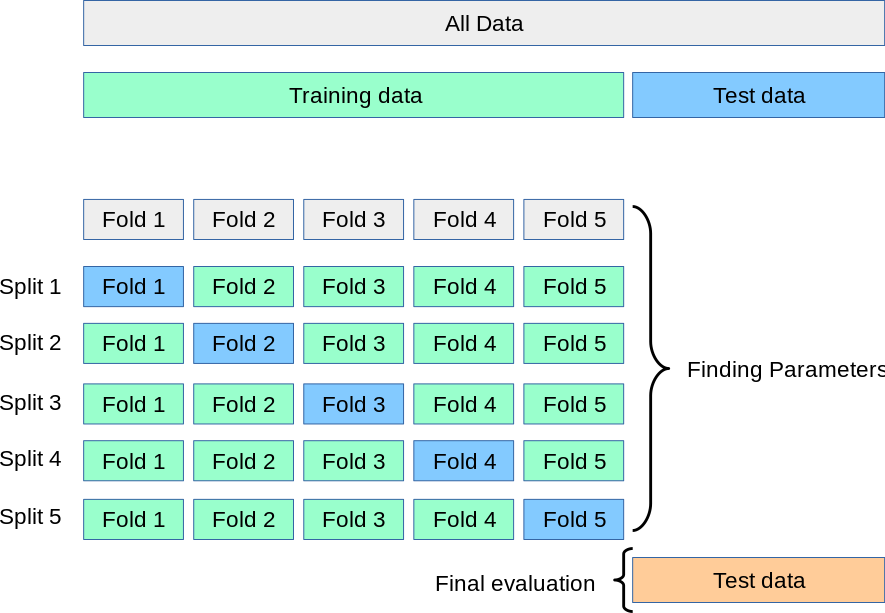 <br>
**k-겹 교차 검증(k-fold cross validation)**<br>

&nbsp;&nbsp;이 레시피에서 사용된 **k-겹 교차 검증(k-fold validation)** 은 가장 대표적으로 사용되는 교차 검증 방법입니다. <br>
K-겹 교차 검증에서는 train data를 동일한 크기를 가진 k개의 폴드로 나눕니다. <br>
첫번째 학습에서는 폴드 1을 validation data로 나머지 k-1개 폴드를 train data로 사용합니다. <br>
마찬가지로 두번째 학습에서는 폴드 2를 validation data로 나머지를 train data로 사용합니다. <br>
이렇게 validation data와 train data를 변화시키며 k번의 모델 학습을 진행하게 됩니다. <br>
이렇게 변화하는 validation data에서 얻어진 검증 결과를 모델 튜닝 단계에서 활용하는 것입니다. <br>
수집된 데이터가 적어 test data를 따로 확보하기 어려운 경우에도 이러한 k-겹 교차검증을 사용한다면, 모든 데이터를 학습에 활용할 수 있게 되어 모델 성능을 향상시킬 수 있습니다. <br>
이 레시피에서는 **5겹 교차검증(5-fold cross validation)** 을 사용하였습니다. 

### 함수 정의

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV


def GetBasedModel(X_train, y_train, model_dict = {}, model = '', search_param_range = {}, parameter_dict = {}, SEED = 0): # 모델 선언

    if model == 'qda':
        model_name = 'QDA'
        model_dict[model_name] = {}
        model_dict[model_name]['pipeline'] = Pipeline([(model_name, QDA())])
        
    elif model == 'nb':
        model_name = 'NB'
        model_dict[model_name] = {}
        model_dict[model_name]['pipeline'] = Pipeline([(model_name, GaussianNB())])
        
    elif model == 'svm':
        model_name = 'SVM'
        model_dict[model_name] = {}
        model_dict[model_name]['pipeline'] = Pipeline([(model_name, SVC(class_weight='balanced',max_iter = 5000,random_state = SEED, probability=True))])
        
    elif model == 'rf':
        model_name = 'RF'
        model_dict[model_name] = {}
        model_dict[model_name]['pipeline'] = Pipeline([(model_name, RandomForestClassifier(class_weight='balanced',random_state = SEED))])
        
    elif model == 'et':
        model_name = 'ET'
        model_dict[model_name] = {}
        model_dict[model_name]['pipeline'] = Pipeline([(model_name, ExtraTreesClassifier(class_weight = 'balanced',random_state = SEED))])
        
    elif model == 'lightgbm':
        model_name = 'lightgbm'
        model_dict[model_name] = {}
        model_dict[model_name]['pipeline'] = Pipeline([(model_name, lgb.LGBMClassifier(scale_pos_weight=30,random_state = SEED, metric='auc'))])
        
    elif model == 'xgboost':
        model_name = 'xgboost'
        model_dict[model_name] = {}
        model_dict[model_name]['pipeline'] = Pipeline([(model_name, XGBClassifier(scale_pos_weight=5,random_state =SEED,eval_metric='mlogloss', use_label_encoder=False))])
        
    elif model == 'logistic':
        model_name = 'logistic'
        model_dict[model_name] = {}
        model_dict[model_name]['pipeline'] = Pipeline([(model_name, LogisticRegression(class_weight = 'balanced',max_iter = 2000))])
        
    for i in list(search_param_range):
        search_param_range[model_name+'__'+i] = search_param_range.pop(i)
        
    print(model_name)
    scoring1 = make_scorer(roc_auc_score, needs_proba=False)
    model_dict[model_name]['search_param_range'] = search_param_range
    model_dict[model_name]['classifier'] = GridSearchCV(model_dict[model_name]['pipeline'], param_grid = search_param_range, cv=5, scoring=scoring1, n_jobs=5)
    model_dict[model_name]['classifier'].fit(X_train,y_train)

    print(f"최적의 파라미터: {model_dict[model_name]['classifier'].best_params_}")    
#         print(model_dict[model_name]['classifier'].cv_results_)

    parameter_dict[model_name] = model_dict[model_name]['classifier'].best_params_
        
        
    return model_dict, parameter_dict



## 모델 학습 및 최적 하이퍼파라미터 도출
 
**목차** <br>
 **- 3.2.1. LR(Logistic Regression)** <br>
 **- 3.2.2. SVM(Support Vector Machine)** <br>
 **- 3.2.3. QDA(Quadratic Discriminant Analysis)** <br>
 **- 3.2.4. NB(Naive Bayes)** <br>

---------------------------------------
**Decision tree 앙상블 기반 기법** 

**- 3.2.5. RF(Random Forest)** <br>
**- 3.2.6. ET(Extremly randomized Trees)** <br>
**- 3.2.7. XGBoost(Extreme Gradient Boosting)** <br>
**- 3.2.8. LightGBM(Light Gradient Boosting Machine)** <br>

### Logistic Regression(LR)

#### 개요
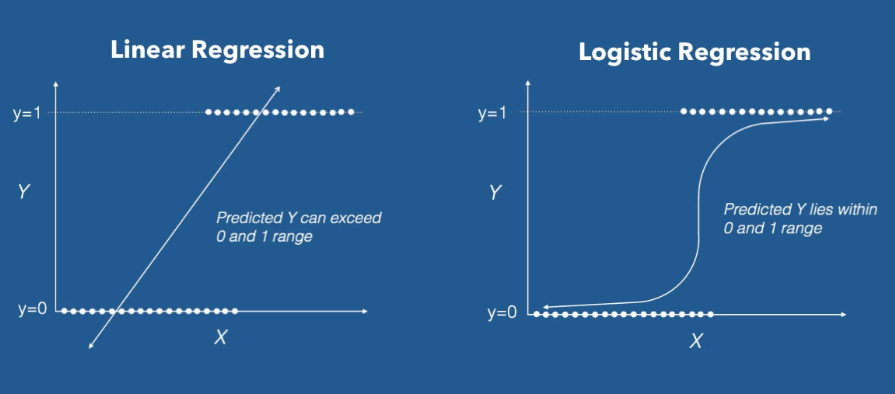 <br>
**LR(Logistic Regression)**<br>

&nbsp;&nbsp;**로지스틱 회귀분석(LR)** 은 범주형 반응 변수(Y)와 독립 변수 간의 관계를 추정하는 모델을 생성하는 통계 기법입니다. <br>
선형 회귀분석은 반응 변수(Y)가 범주형(1/2/3...)일 경우 사용할 수 없기 때문에, 오즈(odds)를 활용해 회귀분석이 가능하도록 한 것이 LR 모델입니다. <br>
LR 모델은 학습을 통해서 여러 독립 설명 변수(X) 집합으로부터 종속 변수(Y)인 범주 발생 확률을 가장 잘 설명하는 모델을 생성합니다. <br>
이러한 목적을 위하여 두 범주의 발생확률의 비율인 오즈와 입력 값을 확률 밀도함수의 범위인 0과 1 사이로 바꿔주는 로지스틱 함수를 활용합니다. <br>
LR 모델에는 두 가지 주요한 장점이 있습니다. <br>
공변량의 교란 요인 효과를 제어하기 위해 LR 모델은 공변량을 포함하는 모델과 포함하지 않은 모델의 독립 변수에 대한 추정된 계수를 비교합니다. <br>
또한 얻어지는 각 변수의 선형 결합식은 로그 오즈(log odds)가 되어 직관적인 해석이 가능합니다. 

-------------------------------
**탐색 하이퍼파라미터**
- **C** : 결정 경계를 설정할 때 얼마나 많은 데이터 샘플이 다른 범주에 포함되는 것을 허용할 지 결정하는 파라미터입니다. <br>
이는 이상치(outlier)가 얼마나 존재하고 허용할 것인지에 따라 변화합니다. <br>
C값이 작을수록 오분류를 많이 허용하며, 작을수록 적게 허용하게 됩니다. <br>
C값을 낮게 설정하면 이상치들이 존재할 가능성이 높다 판단하여 오분류를 어느 정도 허용하는 관대한 결정 경계를 탐색하며, 높게 설정할 경우 이상치의 존재 가능성을 작게 판단하여 오분류를 허용하지 않는 복잡한 결정 경계를 탐색합니다. <br>
C가 너무 크게 설정될 경우 학습 데이터를 매우 정확하게 분류하지만, 과적합(overfit)될 가능성이 높아집니다. 
- **gamma** : 데이터 내부 하나의 샘플 포인트가 영향력을 행사하는 거리를 결정합니다. <br>
Gamma가 커질수록 한 데이터 포인트가 영향력을 행사하는 거리가 작아지는 반면, gamma가 낮을수록 커지게 됩니다. <br>
따라서 gamma가 커질수록 결정 경계의 곡률이 커지는 것을 관찰할 수 있습니다. <br>
파라미터 C와 마찬가지로 너무 크게 설정될 경우 과적합(overfit)될 가능성이 높아집니다. 
- **kernel** : 모델에 사용될 커널 함수의 종류를 결정합니다. Linear, poly, rbf, sigmoid등의 커널 함수를 선택할 수 있습니다. 


#### 실행 및 결과

In [27]:
model_dict = {}
parameter_dict = {}
model_dict, parameter_dict = GetBasedModel(model_dict = model_dict, model = 'logistic', X_train = X_train, y_train = y_train,
                          search_param_range = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty': ['l2','none']}, SEED = SEED)

logistic
최적의 파라미터: {'logistic__C': 10, 'logistic__penalty': 'l2'}


### Support Vector Machine(SVM)

#### 개요
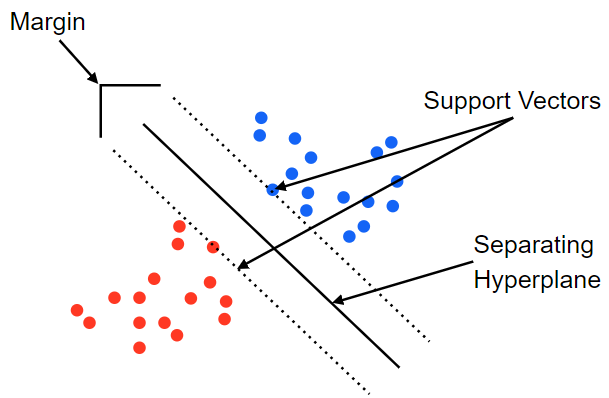 <br>
**SVM(Support Vector Machine)**<br>

&nbsp;&nbsp;**SVM(Support vector machine)** 은 주어진 데이터에 대하여 support vector 사이의 마진(margin)을 최대화하는 범주간 분류 규칙을 찾아내는 대표적인 기계 학습 기법입니다. <br>
마진(margin)이란 범주들을 구별하는 초평면과 이에 가장 근접한 샘플 포인트인 support vector사이의 거리를 의미합니다. <br>
기본적으로 데이터셋 내부의 샘플들이 n개의 변수(특징)들로 구성될 때, 샘플들은 n차원 데이터 공간에 분포하게 됩니다. <br>
SVM의 목적은 n차원의 데이터 공간 하에서 데이터 범주들을 구분해 내는 최적의 결정 경계(decision boundary)가 되는 초평면을 찾아내는 것입니다. <br>
또한 SVM은 선형 분류를 하기에 결정 경계가 복잡한 경우, 커널이라는 맵핑 함수를 사용하여 비선형 또는 비모수 분할선을 사용할 수 있습니다. <br>
사용하는 커널 함수의 종류에 따라 유연한 분류 결과를 얻을 수 있습니다. 

-------------------------------
**탐색 하이퍼파라미터**
- **penalty** : 정규화 방식을 지정하는 파라미터입니다. <br>
정규화 항을 사용하지 않거나 l1, l2의 선택이 가능합니다. <br>
L1 정규화를 사용할 경우 변수선택 효과가 존재하고, l2 정규화는 정규화 효과가 커집니다. 
- **C** : 정규화 효과의 강도를 결정하는 파라미터입니다. <br>
양수 값을 사용해야 합니다. <br>
C값이 작을수록 제약이 커져 모델의 복잡도가 감소하고, C값이 증가할수록 정규화 효과가 적어져 모델의 복잡도가 증가하게 됩니다. 



#### **실행 및 결과**

In [38]:
model_dict, parameter_dict = GetBasedModel(model_dict = model_dict, model = 'svm', X_train = X_train, y_train = y_train, SEED = SEED, 
                          search_param_range = {'C': [0.5,1.0,1.5,2.0], 'gamma': ['auto','scale'] , 'kernel': ['linear', 'rbf']})

SVM
최적의 파라미터: {'SVM__C': 0.5, 'SVM__gamma': 'auto', 'SVM__kernel': 'linear'}


/home/begas/anaconda3/envs/ChungbukAI/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/begas/anaconda3/envs/ChungbukAI/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/begas/anaconda3/envs/ChungbukAI/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
/home/begas/anaconda3/envs/ChungbukAI/lib/python3.8/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=3000).  

### Quadratic Discriminant Analysis(QDA)

#### 개요
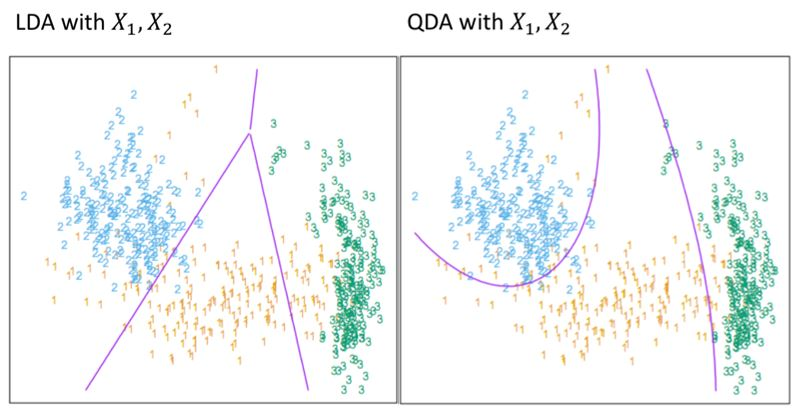SVM(Support Vector Machine)
<출처: An introduction to statistical learning> <br>
**QDA(Quadratic Discriminant Analysis)**<br>

&nbsp;&nbsp;**판별분석(Discriminant analysis)** 은 데이터에 두 개 이상의 모집단으로부터 추출된 표본들이 존재할 때, 표본들이 어느 모집단에 속해 있는지 판별하는 판별 함수를 만들어 범주를 분류하는 분석 방법입니다. <br>
그 중에서도 모집단(범주) 간 공분산 구조가 상이할 때 **이차판별분석(QDA)** 를 사용합니다. <br>
**이차 판별 분석(QDA)** 는 LDA와 다르게 범주간 공분산 구조의 차이를 반영하여 비선형 결정 경계(Decision boundary)를 만들어 데이터를 분류하기 때문에 비선형 분류가 가능합니다. <br>
당연히 선형 분류보다 데이터 샘플이 많이 필요합니다. <br>
또한 설명 변수(입력 변수)의 개수가 많을 경우 추정해야 하는 모수가 많아져 연산량이 커지게 됩니다. 

-------------------------------
**탐색 하이퍼파라미터**
- **reg_param** : 정규화 효과의 강도를 결정하는 파라미터입니다. <br>
0과 1 사이의 값을 사용합니다.
- **tol** : 특정 데이터 수치의 유효성을 결정하는 절대값 threshold입니다. <br>
입력 변수의 절대값이 파라미터 값보다 작을 경우 학습에 사용되지 않습니다. 


#### **실행 및 결과**

In [31]:
model_dict, parameter_dict = GetBasedModel(model_dict = model_dict, model = 'qda', X_train = X_train, y_train = y_train, SEED = SEED, 
                          search_param_range = {'reg_param': [0.0,0.001,0.01,0.1, 0.5], 'store_covariance': (True, False), 'tol': (0.0001, 0.001,0.01, 0.1)})

QDA
최적의 파라미터: {'QDA__reg_param': 0.01, 'QDA__store_covariance': True, 'QDA__tol': 0.0001}


### Naive Bayes(NB)

#### 개요
**NB(Naive Bayes)**<br>

&nbsp;&nbsp;**Naïve bayes(NB)** 는 베이즈 정리와 조건부 확률을 기반으로 오분류 확률을 최소화하는 분류 모델을 학습하는 기법입니다. <br>
특징(입력 변수)들 간의 확률적 독립을 가정하여 몇 가지 규칙에 따라서 사후 확률을 최대화하는 방향으로 학습을 진행합니다. <br>
NB는 다른 복잡한 기계학습 기법에 비해 연산이 간결하고 효율적이며 정확도 또한 우수합니다. <br>
대용량 데이터를 사용할 때도 속도가 빠르며 높은 분류 정확도를 갖습니다. <br>
하지만 독립 가정이 위배되었을 때는 성능이 하락하게 됩니다. <br>
실제 데이터에서는 특징들이 완전하게 독립적인 경우가 많지 않아, 기법 사용에 유의해야 합니다.

-------------------------------
**탐색 하이퍼파라미터**
- **var_smoothing** : 학습 데이터에는 존재하지 않고 검증 데이터에만 존재하는 범주가 있거나 학습 데이터에서 특정 범주의 데이터 개수가 적은 경우, 확률 계산이 정상적으로 이루어지지 않는 경우가 존재합니다. <br>
이러한 문제를 해결하기 위하여 laplace smoothing과 같은 데이터 평활(smoothing) 기법들을 사용합니다. <br>
이 파라미터는 이러한 평활 기법의 강도를 결정합니다.  





#### **실행 및 결과**

In [32]:
model_dict, parameter_dict = GetBasedModel(model_dict = model_dict, model = 'nb', X_train = X_train, y_train = y_train, SEED = SEED, 
                          search_param_range = {'var_smoothing': [1e-11, 1e-10, 1e-9, 1e-8, 1e-7]})

NB
최적의 파라미터: {'NB__var_smoothing': 1e-11}


<span style="font-size:175%; font-weight:bold;">모델 학습 5 - 8 : Decision tree 앙상블 기반 기법들</span> <br>
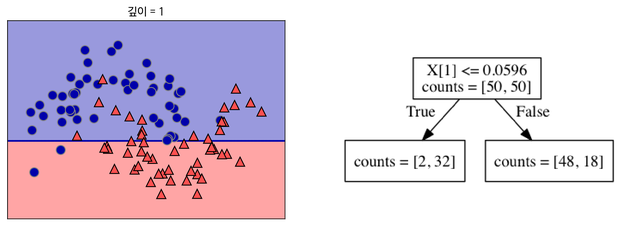
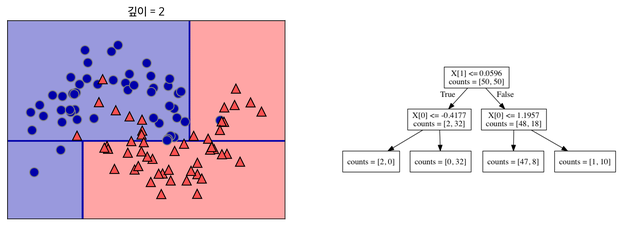 <br> <출처: Tensorflow blog (blog.tensorflow.org)> <br>

**Decision tree**<br>

&nbsp;&nbsp;**의사결정 트리(Decision tree) 학습법**은 인공 신경망(Neural network)와 함께 가장 대표적인 기계 학습 기법입니다. <br>
데이터의 입력 변수를 바탕으로 목표 변수의 값을 예측하는 모델을 생성하는 것을 목표로 하는 지도 학습 기법입니다. <br>
결정 트리는 각 단계(노드)마다 특정 기준에 대한 True/False 여부에 따라 분기를 이어가며 학습이 진행되며, 분류(Classification)와 회귀(Regression) 모두 가능한 모델입니다. <br>
모든 단계(노드)에서 분기를 진행한 후 오류가 가장 적어지는(손실 함수가 최소화되는) 입력 변수와 수치를 탐색하여 이를 기준으로 분기를 진행합니다.  

-------------------------------
**장점**
- 연속형/범주형 데이터 모두 사용 가능 -> 전처리가 용이합니다
- 모델의 분류/결정 기준 파악 가능 -> 결과물의 해석 및 직관적인 이해가 가능합니다
- 성능에 비해 연산량이 적어 대규모 데이터에도 안정적인 결과 산출이 가능합니다
**단점**
- 모델 학습 단계에서 일반화를 진행하지 못할 경우 과적합 문제가 발생합니다
- 일반화가 어렵고 성능의 변동폭이 크다
- 한 번에 한개의 변수만을 가지고 분기를 진행하기 때문에 변수가 많아져 특정 변수에 의해 확실히 구분되지 않는 경우, 모델은 복잡해지고 성능 또한 하락하게 됩니다


### Random Forest(RF)

#### 개요
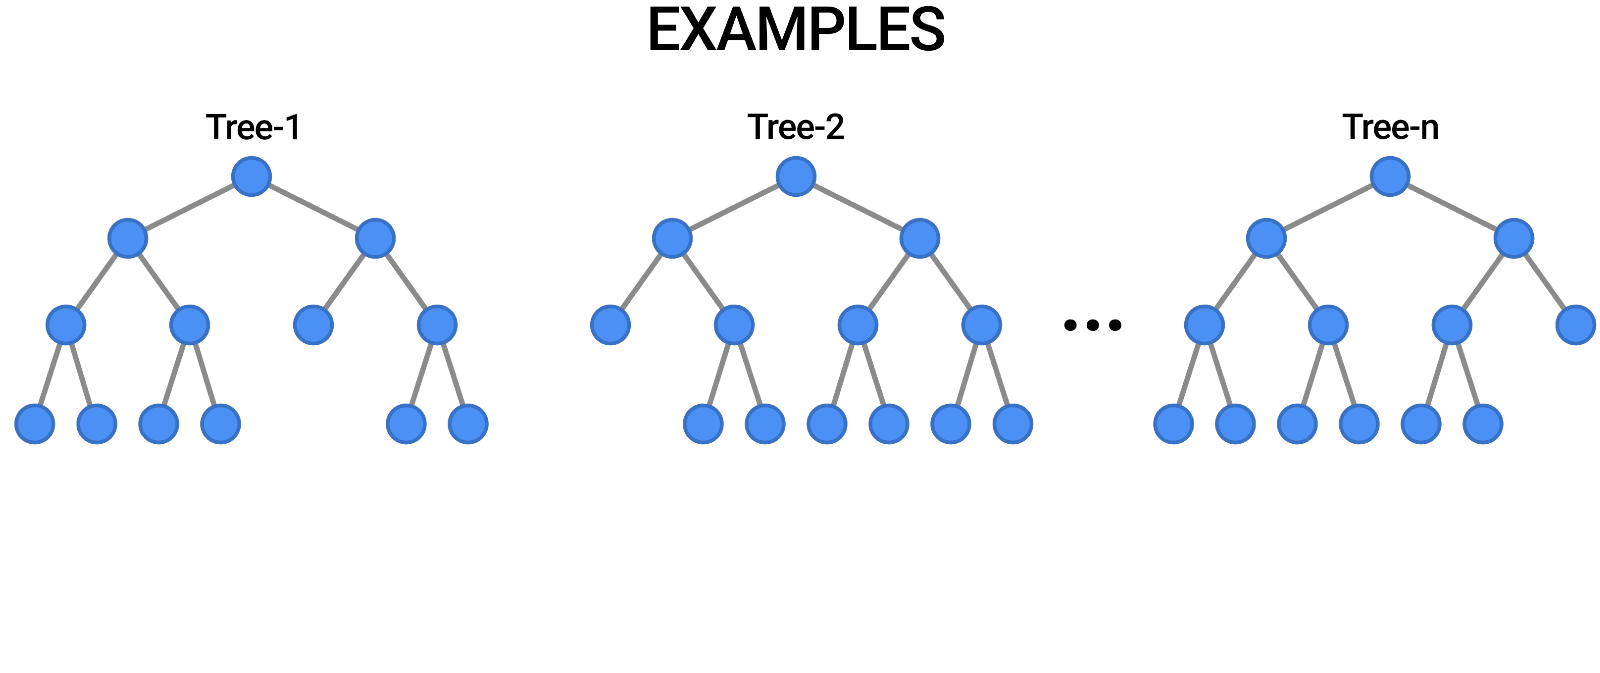 <출처: Tensorflow blog (blog.tensorflow.org)> <br>

**RF(Random Forest)**<br>

&nbsp;&nbsp;**Random forest(RF)** 는 서로 다른 트리 분류기를 여러 개 생성하여 이 기초 분류기들의 예측 결과를 결합하여 최종 결과물을 산출하는 트리 기반의 앙상블 기계 학습 기법입니다. <br>
앙상블 기법 중 배깅(Bagging; Bootstrap aggregation)을 활용하는데, 학습 데이터들 중에서 중복을 허용한 샘플링을 진행하여 새로운 부트스트랩 샘플을 형성하여 학습에 활용하게 됩니다. <br>
또한 데이터셋만 변화시키는 것이 아니라, 학습에 사용되는 입력 변수(feature)에도 변화를 주게 됩니다. <br>
각각의 분류기는 전체 feature가 아닌 서로 다른 부분집합을 사용합니다. <br>
이렇게 생성된 다수의 기초 분류기들의 예측 결과들을 종합하여 비율이 가장 높은 것을 최종 예측 결과물로 도출합니다. <br>
이러한 앙상블 과정을 통하여 개별 트리 분류기의 고분산(high-variance) 문제를 해결하며, 일반화 성능을 높여 과적합(overfit) 위험을 줄인 강력한 분류기의 생성이 가능합니다. 

-------------------------------
**탐색 하이퍼파라미터**
- **max_depth** : 각 트리 분류기의 최대 깊이, 즉 트리 분류기의 복잡도를 결정합니다. <br>
분류기의 성능을 높이기 위해서는 어느정도의 깊이가 필요하지만, 너무 깊을 경우 과적합 가능성이 증가합니다.
- **min_samples_leaf** : 리프 노드가 되기 위해 필요한 최소한의 샘플 데이터 개수입니다. <br>
과적합을 제어하는 역할을 수행합니다. <br>
범주별 데이터 개수 차이가 큰 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정해야 합니다.
- **min_samples_split** : 노드를 분할할 때 사용할 최소한의 샘플 데이터 개수를 지정합니다. <br>
마찬가지로 과적합을 제어하는 용도로 사용됩니다. <br>
작게 설정할수록 분할되는 노드가 많아져 과적합 가능성이 증가하게 됩니다.






#### **실행 및 결과**

In [33]:
model_dict, parameter_dict = GetBasedModel(model_dict = model_dict, model = 'rf', X_train = X_train, y_train = y_train, SEED = SEED, 
                          search_param_range = {'max_depth':[6,8,10], 'min_samples_leaf':[8,12,16], 'min_samples_split':[8,16,24]})

RF
최적의 파라미터: {'RF__max_depth': 6, 'RF__min_samples_leaf': 16, 'RF__min_samples_split': 8}


### Extremly randomized Trees(ET)

#### 개요
**ET(Extremely randomized Trees)**<br>

&nbsp;&nbsp;**Extremely randomized Trees(ET)** 는 랜덤 포레스트를 기반으로 무작위성 요소를 대폭 증가시킨  앙상블 기계학습 알고리즘입니다. <br>
기본적인 방식은 여러 개의 트리 분류기를 생성하여 예측 결과물을 종합하여 사용하는 방식에서 랜덤 포레스트와 유사합니다. <br>
차이점은 트리 분류기의 모든 분기에서 사용될 feature(입력 변수)를 무작위적으로 선택하며, 부트스트랩 샘플 대신 원본 데이터를 사용합니다. <br>
무작위 입력변수를 분기 기준으로 사용할 경우 개별 분류기의 성능은 낮아지기 때문에, 앙상블 기법을 함께 활용하여 과적합을 줄이고 일반화 성능을 높일 수 있습니다. <br>
분기 시 모든 변수를 탐색하는 것이 아니라 무작위적으로 선택하기 때문에 학습 속도가 랜덤 포레스트보다 빠릅니다. <br>
하지만 무작위성이 크기 때문에 학습을 위해 많은 양의 학습 데이터가 필요하게 됩니다. <br>
잘 학습될 경우 낮은 편향(bias)과 분산(variance)를 가지게 됩니다. 


-------------------------------
**탐색 하이퍼파라미터**
- **max_depth** : 각 트리 분류기의 최대 깊이, 즉 트리 분류기의 복잡도를 결정합니다. <br>
분류기의 성능을 높이기 위해서는 어느 정도의 깊이가 필요하지만, 너무 깊을 경우 과적합 가능성이 증가합니다.
- **n_estimators** : 생성할 트리 분류기의 개수를 결정합니다. <br>
증가할수록 알고리즘의 성능은 정교해지지만 이에 비례하여 학습 및 예측 소요 시간이 증가하게 됩니다. 



#### **실행 및 결과**

In [34]:
model_dict, parameter_dict = GetBasedModel(model_dict = model_dict, model = 'et',X_train = X_train, y_train = y_train, SEED = SEED, 
                          search_param_range = {'max_depth': [2, 4, 7, 12, 16], 'n_estimators': [25, 50, 100, 250]})

ET
최적의 파라미터: {'ET__max_depth': 2, 'ET__n_estimators': 250}


### Extreme Gradient Boosting(XGBoost)

#### 개요
 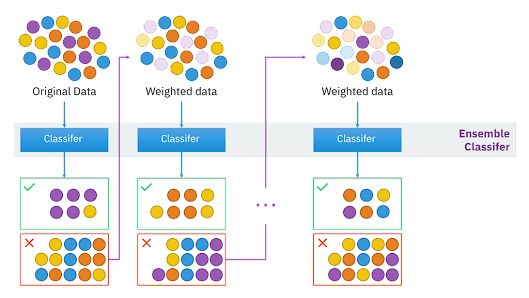<br>
**Boosting**<br>

&nbsp;&nbsp; **Boosting**이란 Random forest에 사용된 bagging과 함께 대표적인 앙상블 기법으로써, 약한 분류기(weak learner)를 결합하여 강한 분류기(strong learner)를 만드는 기법입니다. <br>
예를 들어, 기초 분류기 A, B, C가 각각 0.6 정도의 정확도를 갖는다고 할 때, A, B, C를 결합하여 0.8 정도의 더 높은 정확도를 얻는 것이 앙상블 알고리즘의 기본 원리입니다. <br>
Boosting 에서는 세 개 학습기의 학습을 동시가 아니라 순차적으로 실행합니다. <br>
A 분류기를 만든 후, A로부터 얻어진 잔차 등과 같은 정보를 바탕으로 B 분류기를 만들고, 다시 그 정보를 바탕으로 C 분류기를 만듭니다. <br>
가중치를 두고 이러한 과정을 반복함으로써 점점 모델의 오류를 줄여 나갈 수 있습니다. <br>
최종적으로 만들어진 분류기들을 모두 결합하여 모델 성능이 우수한 최종 모델을 만들게 됩니다. 

-------------------------------







**XGBoost**<br>

 &nbsp;&nbsp;**XG Boost(Extreme Gradient Boosting)** 는 Gradient boosting 기법을 사용하는 트리 기반 앙상블 ML 알고리즘입니다. <br>
이 알고리즘은 GBM(Gradient Boosting machine)에 정규화 항을 추가하는 것이 특징입니다. <br>
정규화 항에 따라서 다양한 손실 함수를 지원하여 작업에 따라 유연하게 모델을 튜닝할 수 있는 장점이 있습니다. <br>
또한 정규화 항은 모델이 너무 복잡해지지 않도록 패널티를 주어 과적합(overfit)을 방지하는 데 도움이 됩니다. 

-------------------------------
**탐색 하이퍼파라미터**
- **max_depth** : 각 트리 분류기의 최대 깊이, 트리 분류기의 복잡도를 결정합니다. <br>
분류기의 성능을 높이기 위해서는 어느정도의 깊이가 필요하지만, 너무 깊을 경우 과적합 가능성이 증가합니다.  
-**gamma** : 분류기의 노드의 추가 분기를 결정하는 기준이 될 최소 손실함수의 감소값을 결정합니다. <br>
해당값보다 손실 함수의 감소량이 클 때 분기하게 되며, 값이 클수록 과적합 방지 효과가 있습니다. 
-**scale_pos_weight** : 클래스 별 샘플 개수에 유의한 차이가 있는 imbalanced data에서 모델 학습이 제대로 진행되지 않는 현상을 방지하기 위하여 class weight를 결정하는 파라미터입니다. <br>
일반적으로 minor class와 major class의 비율을 사용합니다. 
-**eval_metric** : 모델의 평가 함수를 결정합니다. <br>
데이터의 특성에 맞춰 rmse, mae, logloss(negative log-likelihood), error(binary classification error rate), mlogloss(multiclass log loss), auc(area under curve), map(mean average precision) 와 같은 평가 함수들을 사용할 수 있습니다.


#### **실행 및 결과**

In [35]:
import warnings
warnings.filterwarnings('ignore')
model_dict, parameter_dict = GetBasedModel(model_dict = model_dict, model = 'xgboost', X_train = X_train, y_train = y_train, SEED = SEED, 
                          search_param_range = {'max_depth':[5,6,8], 'gamma':[0,1,2,3], 'scale_pos_weight':[1,5,7,9]})

xgboost
최적의 파라미터: {'xgboost__gamma': 3, 'xgboost__max_depth': 6, 'xgboost__scale_pos_weight': 7}


### Light Gradient Boosting Machine(LightGBM)

#### 개요
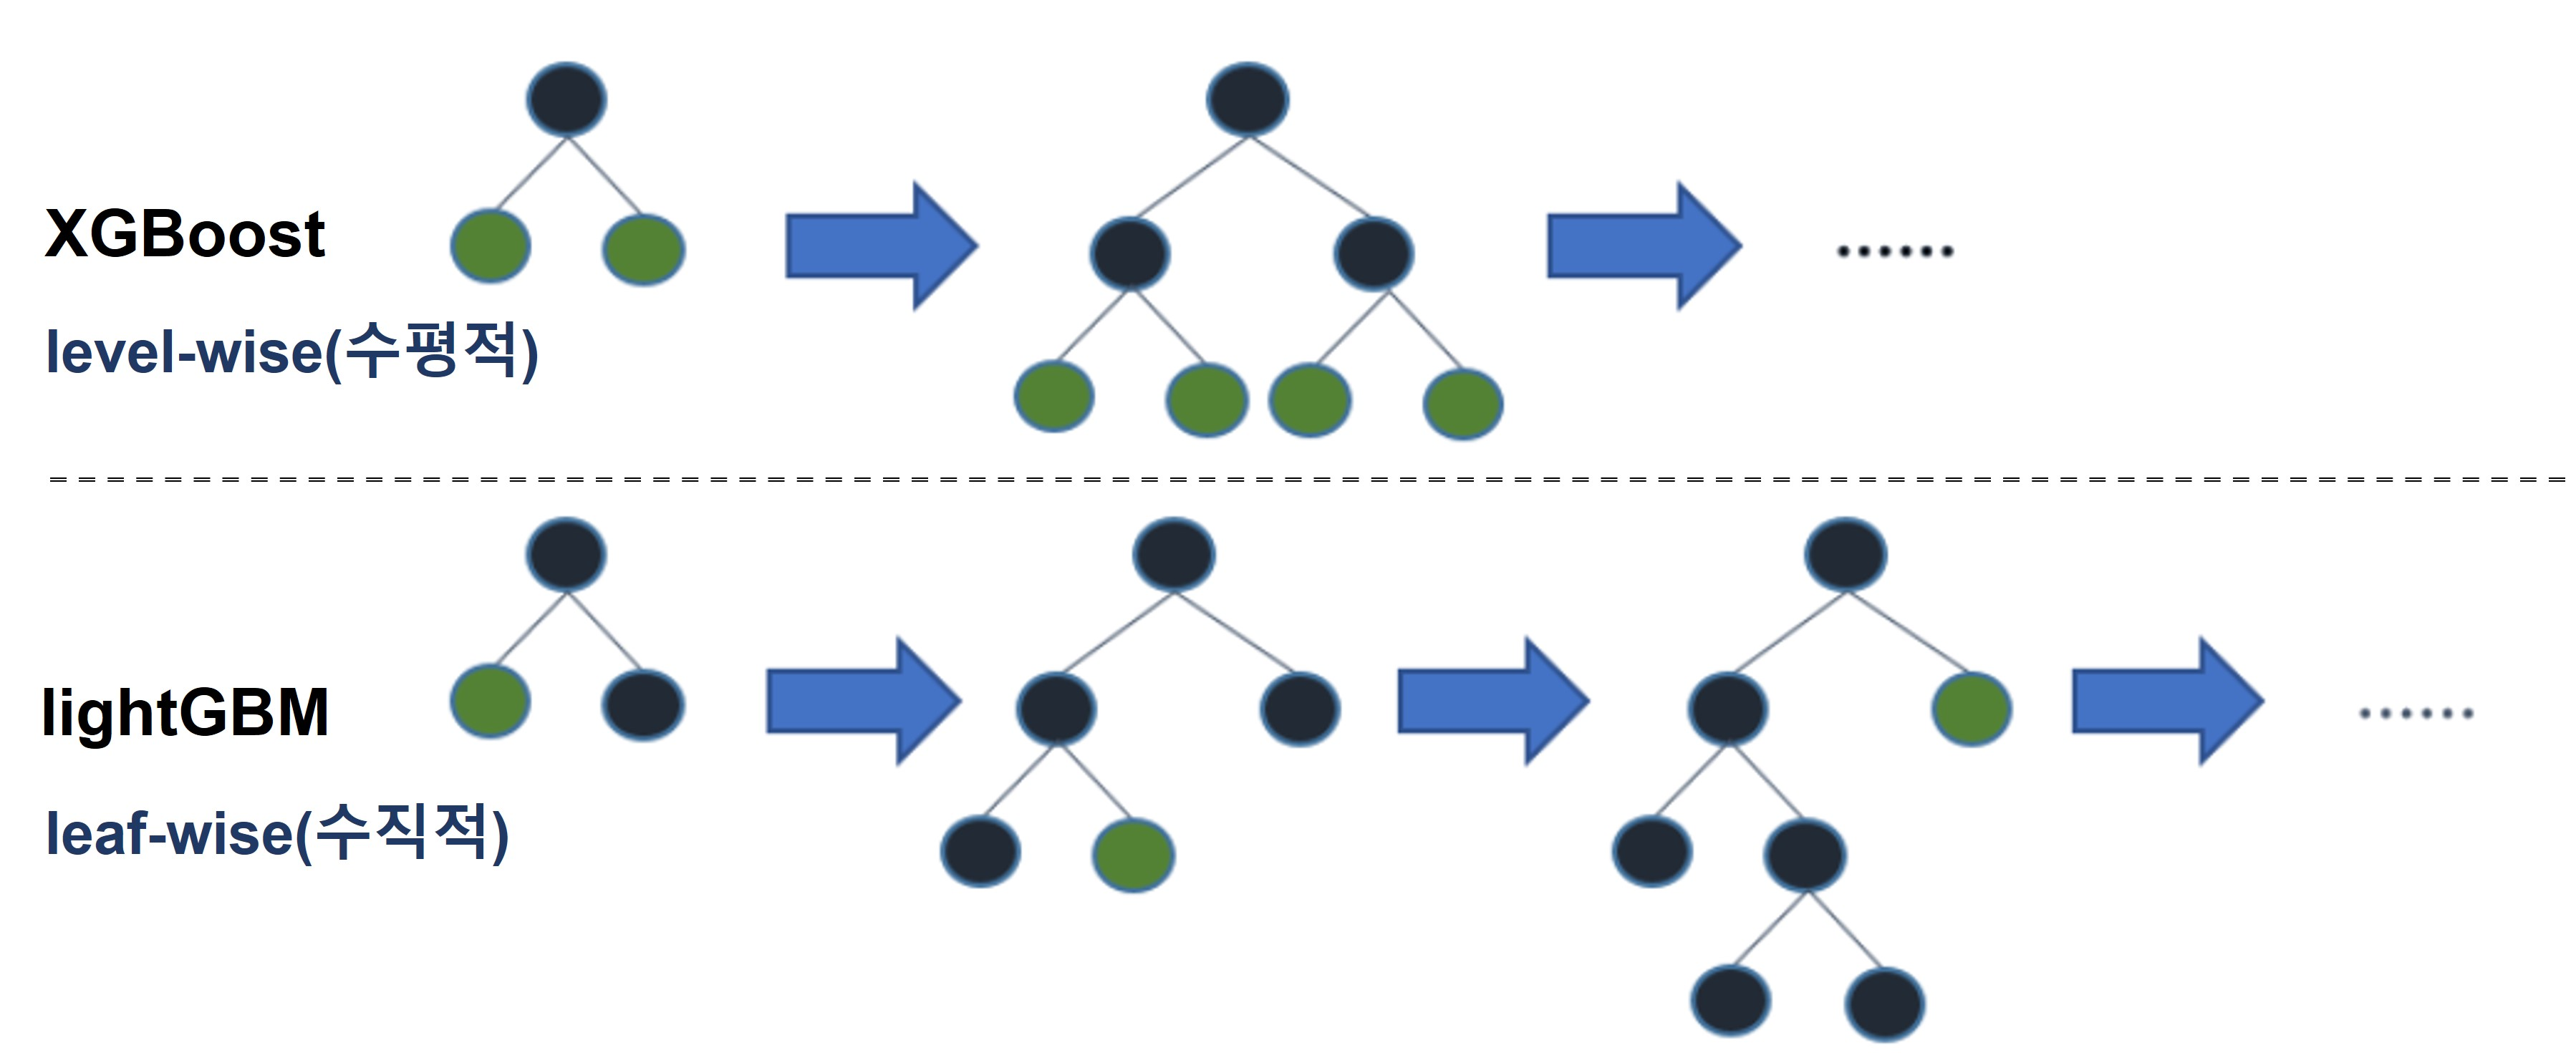<br>
**Light GBM(Light Gradient Boosting Machine)**<br>

&nbsp;&nbsp;**Light GBM(Light Gradient Boosting Machine)** 은 Gradient Boosting 기법을 사용하는 트리 기반 앙상블 ML 알고리즘입니다. <br>
기존의 GBM은 모든 입력 변수와 데이터 샘플을 가지고 정보 이득을 추정합니다. <br>
따라서 최적의 솔루션을 찾는 장점이 있지만 시간이 오래 걸린다는 단점이 있습니다. <br>
따라서 Light GBM 알고리즘은 gradient -based one side sampling과 exclusive feature bundling을 도입하여 이러한 문제를 해결하였습니다. <br>
일반적인 균형 트리 분기(level-wise)가 아닌 리프 중심 트리 분기(leaf-wise)를 사용하여 비대칭적인 트리를 만듦으로써 손실을 최소화할 수 있습니다. <br>
결과적으로 Light GBM은 대용량 데이터를 처리할 때 학습 및 예측 속도가 빠르며 메모리 소모가 적다는 장점이 있습니다. <br>
그러나 데이터의 규모가 작을 때에는 과적합(overfit) 위험이 다른 알고리즘보다 높습니다. 


-------------------------------
**탐색 하이퍼파라미터**
- **scale_pos_weight** : 클래스 별 샘플 개수에 유의한 차이가 있는 imbalanced data에서 모델 학습이 제대로 진행되지 않는 현상을 방지하기 위하여 class weight를 결정하는 파라미터입니다.<br>
일반적으로 minor class와 major class의 비율을 사용합니다. 
- **eval_metric** : 모델의 평가 함수를 결정합니다. <br>
데이터의 특성에 맞춰 rmse, mae, logloss(negative log-likelihood), error(binary classification error rate), mlogloss(multiclass log loss), auc(area under curve), map(mean average precision) 와 같은 평가 함수들을 사용할 수 있습니다.




#### **실행 및 결과**

In [36]:
model_dict, parameter_dict = GetBasedModel(model_dict = model_dict, model = 'lightgbm', X_train = X_train, y_train = y_train, SEED = SEED, 
                          search_param_range = {'scale_pos_weight':[20,40,60,80]} )

lightgbm
최적의 파라미터: {'lightgbm__scale_pos_weight': 60}


## 변수 중요도(Feature importance) 추출   

### 개요

**Feature importance**<br>

학습 과정에서 변수의 차원을 줄이기 위해, 혹은 분석 결과를 활용해 추후 데이터 수집 계획을 세우거나 인과성을 밝히기 위해 중요한 것이 바로 **변수 중요도**를 측정하는 것입니다. <br> 
변수 중요도를 통하여 분류 모델이 의사 결정을 진행할 때 어떤 변수들의 영향력이 크고 작은지 파악할 수 있습니다. <br> 
 목적을 위해 중요한 변수가 무엇인지 파악하는 것은 분석이나 연구를 진행할 때 가장 중요한 과업 중 하나입니다.<br> 
이러한 중요 변수 결과를 파악하면 기존의 이론을 뒷받침하는 근거로 사용하거나, 새로운 중요 변수를 찾아내 활용할 수도 있게 됩니다. <br> 
또한 모델 학습 관점에서는, 변수 선택을 진행해 쓸모 없는 변수들을 제거해 중요한 변수들만을 가지고 모델 학습을 진행할 수 있습니다. <br> 
이를 통해 모델 복잡도를 줄여 학습과정에서 자원 효율성을 개선하거나 모델 성능을 증가시킬 수도 있게 됩니다. 

-------------------------

**Permutation feature importance**<br>

여기서 사용한 변수 중요도 산출 방식은 **Permutation feature importance**입니다. <br>
Permutation feature importance를 사용하면 모델의 종류에 상관없이 학습이 완료된 특정 모델을 가지고 변수 중요도를 계산할 수 있습니다. <br>
변수 중요도를 계산하는 가장 단순한 방법으로는 변수 하나를 제거하고 모델을 재학습한 뒤 전후 성능을 비교하는 방법이 있습니다. <br>
하지만 이러한 방식은 시간적, 자원적인 소모가 매우 클 것입니다. <br>
Permutation feature importance에서는 모델을 재학습하지 않고 변수 중요도를 계산합니다. <br>
특정 feature(입력 변수)를 제거하는 것이 아니라 그 값들을 무작위로 뒤섞어 의미 없는 노이즈로 만듭니다. <br>
이렇게 feature단위의 permutation을 진행한 뒤 예측값이 실제값보다 얼마나 차이가 생겼는지 계산함으로써 해당 feature의 영향력을 파악합니다. <br>
해당 feature의 모델에 대한 영향력이 높을 경우에는 예측 성능이 크게 하락할 것입니다. <br>
이러한 방식을 통해 교호작용의 영향도 제거할 수 있습니다. <br>
이렇게 학습된 모델과 데이터만을 가지고 변수 중요도를 산출하는 방법이기에 모델의 학습 기법 및 내부 구조에 대한 정보 없이 어느 모델이든 적용할 수 있습니다. 
다만, 예측 모델의 성능을 바탕으로 변수의 중요도를 산출하기 때문에 **예측 모델의 성능에 따라 산출된 변수중요도의 신뢰도가 크게 영향을 받음**을 주의해야 합니다. 

### 함수 정의

In [24]:
from eli5.sklearn import PermutationImportance
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


def feature_importance(model_dict, X_test, y_test):
    features = X_test.columns
    for model in list(model_dict):
        print(model)
        y_pred = model_dict[model]['classifier'].predict_proba(X_test)[:,1]
        model_dict[model]['y_pred'] = model_dict[model]['classifier'].predict_proba(X_test)[:,1] # 각 모델에 대한 성능을 비교하기 위해 따로 예측 값 저장
        
        imps = PermutationImportance(model_dict[model]['classifier'].best_estimator_.named_steps[f'{model}']).fit(X_test, y_test)
        importances = imps.feature_importances_
        indices = np.argsort(importances)[::-1][:10];indices_list = np.argsort(importances)[::-1]
        print(imps)
#         print(features)
#         print(imps.feature_importances_)
        # Print the feature ranking
        
        print("Feature ranking:")
        for f in range(len(features)):
            model_dict[model]['importance_varable_lst'] = [features[indices_list[f]], importances[indices_list[f]]]
            model_dict[model]['indices_list'] = indices_list
                
        # Plot Feature importances
        sns.barplot(x=importances[indices], y = features[indices])        
        plt.xlabel('Relative Importance')
        plt.title('Variable Importance')
        plt.show()
        
    return model_dict


###  실행 및 결과

logistic
PermutationImportance(estimator=LogisticRegression(C=1,
                                                   class_weight='balanced'))
Feature ranking:


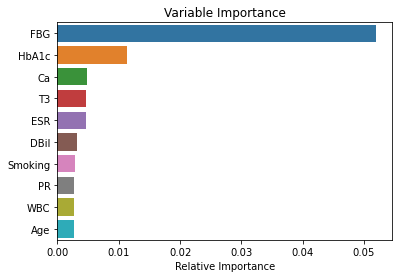

SVM
PermutationImportance(estimator=SVC(C=1.5, class_weight='balanced',
                                    gamma='auto', kernel='linear',
                                    max_iter=2000, probability=True,
                                    random_state=1234))
Feature ranking:


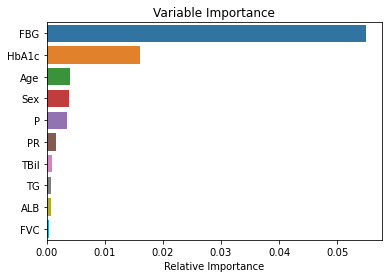

QDA
PermutationImportance(estimator=QuadraticDiscriminantAnalysis(reg_param=0.001,
                                                              store_covariance=True))
Feature ranking:


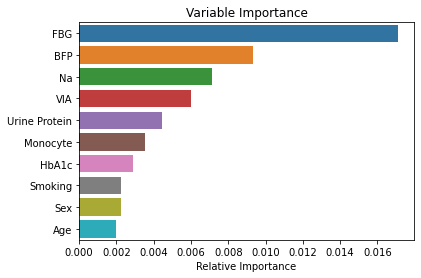

NB
PermutationImportance(estimator=GaussianNB(var_smoothing=1e-11))
Feature ranking:


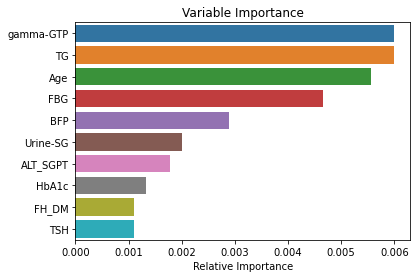

RF
PermutationImportance(estimator=RandomForestClassifier(class_weight='balanced',
                                                       max_depth=6,
                                                       min_samples_leaf=8,
                                                       min_samples_split=8,
                                                       random_state=1234))
Feature ranking:


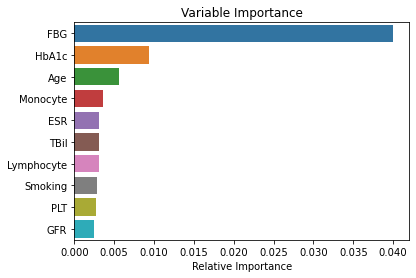

ET
PermutationImportance(estimator=ExtraTreesClassifier(class_weight='balanced',
                                                     max_depth=7,
                                                     random_state=1234))
Feature ranking:


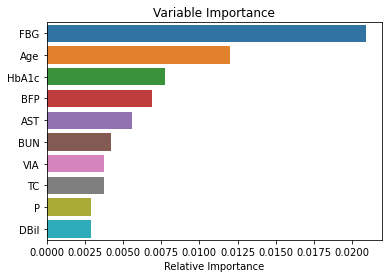

xgboost
PermutationImportance(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              enable_categorical=False,
                                              eval_metric='mlogloss', gamma=3,
                                              gpu_id=-1, importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=8,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=32,
                                

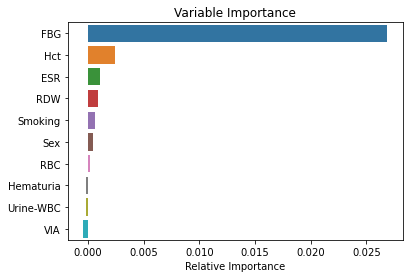

lightgbm
PermutationImportance(estimator=LGBMClassifier(metric='auc', random_state=1234,
                                               scale_pos_weight=40))
Feature ranking:


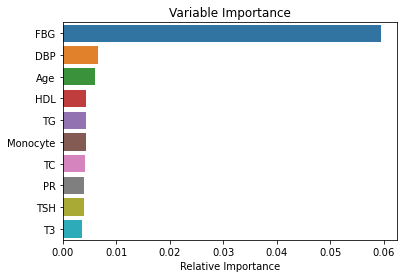

In [25]:
model_dict = feature_importance(model_dict=model_dict, X_test = X_test, y_test = y_test)

## 변수선택  

### 개요

의미 없는 변수가 지나치게 많은 경우 일종의 노이즈가 되어 변수가 모델 성능에 악영향을 끼치는 경우가 있다.  
때문에 사용하는 모델과 데이터의 특성에 따라 변수를 적절히 선택하여 분석을 진행하는 것이 매우 중요하기도 하다.  
변수선택을 위한 알고리즘도 많이 존재하지만, 본 연구에서는 변수 선택이 예측 성능에 매우 큰 영향을 준다고 보기 어려워 앞서 산출한 **feature importance** 를 바탕으로 간단한 변수선택을 진행하였다.  
  
본 연구에서 진행한 변수선택의 과정은 다음과 같다.  
1. 각 모델별 **feature importance**를 기준으로 train set 데이터의 변수를 정렬한다.  
2. 사용하는 변수의 개수를 feature importance가 **낮은 순으로 점차 줄여**가며 train data set에 대한 **5-fold cross validation 예측 성능**을 기록한다.  
3. **가장 예측 성능이 좋았던** 변수 개수를 각 모델별 최적 변수 개수로 선택한다.  

### 함수 정의

In [26]:
def variable_selection(model_dict, X_train, y_train, X_test, y_test):
    
    for model in list(model_dict):
        model_dict[model]['feature_count'] = 57
        best_score = 0
        roc_auc_reduced_lst = [] # 특정 모델에 대해 Feature 개수에 따른 성능 저장
        auc_reduced_list = []
        for feature_count in range(4,53,4): # 중요한 변수의 순서대로 4개씩 학습한 결과에 대한 auc 결과 저장 
            
            scoring = make_scorer(roc_auc_score, needs_proba=True)
            
            selected_param = {}
            for i in list(model_dict[model]['classifier'].best_params_):
                selected_param[i] = [model_dict[model]['classifier'].best_params_[i]]
                
            classifier = GridSearchCV(model_dict[model]['pipeline'], param_grid = selected_param,cv=5, scoring=scoring, n_jobs=5)
            classifier.fit(pd.DataFrame(X_train).iloc[:,model_dict[model]['indices_list'][:feature_count]],y_train)

            # reduced_model_predict
            y_pred_reduced = classifier.predict_proba(pd.DataFrame(X_test).iloc[:,model_dict[model]['indices_list'][:feature_count]])[:,1]
            if classifier.best_score_ >= model_dict[model]['classifier'].best_score_:
                model_dict[model]['feature_count'] = feature_count
                model_dict[model]['y_pred'] = y_pred_reduced
                model_dict[model]['classifier'] = classifier
            roc_auc_reduced = np.round(roc_auc_score(y_test, y_pred_reduced),3)
            roc_auc_reduced_lst.append(roc_auc_reduced)
            
        model_dict[model]['auc_reduced_list'] = roc_auc_reduced_lst # 각 모델 별 Feature 개수에 따른 성능 저장
        
#         Importance_variable_df = pd.DataFrame(model_dict[model]['importance_varable_lst'], columns=['Model', 'feature' ,'PI'])

        # Plot Performance variation of different models on a varying number of variables.

    plt.figure(figsize=(20,6))
    colors = ['blue','orange','green','red','purple','brown','pink','gray','olive']
    for i,color in zip(range(len(list(model_dict))),colors):
        plt.plot(np.arange(4,53,4), model_dict[list(model_dict)[i]]['auc_reduced_list'], marker='^',
             label='{0}'.format(list(model_dict)[i]))

    plt.title('Plot Performance variation of different models on a varying number of variables.')
    plt.legend(fontsize=9,loc="best")
    plt.xlim([0, 53])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Number of variables selected')
    plt.ylabel('AUC')
    plt.show()

        


### 실행 및 결과

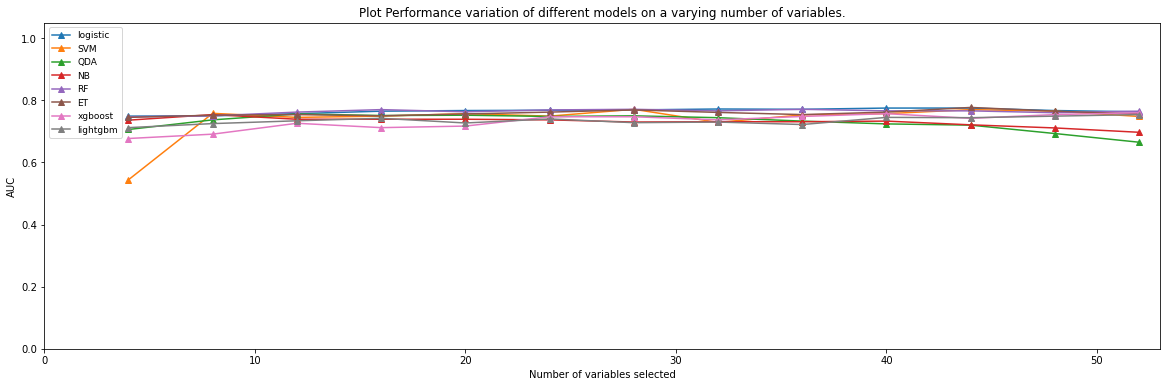

In [27]:
variable_selection(model_dict, X_train, y_train, X_test, y_test)

# 평가부

## 컨퓨전 매트릭스 출력  

### 개요

**Confusion matrix**는 분류 문제에서 예측을 맞게 수행하였는지 **Label** 별로 정리한 행렬이다.  
**Binary classication** 문제인 경우에 confusion matrix에 들어가는 각 원소는 다음과 같다.  
+ 실제로 1(환자)인 것을 1로 맞게 예측한 경우의 수 (True positive, **TP**)
+ 실제로 1인 것을 0으로 틀리게 예측한 경우의 수 (False negative, **FN**)
+ 실제로 0(비환자)인 것을 1로 틀리게 예측한 경우의 수 (False positive, **FP**)
+ 실제로 0인 것을 0으로 맞게 예측한 경우의 수 (True negative, **TN**)

![c](img/confusionmatrix.png)

이때 위 네가지 원소를 활용해 다양한 모델성능평가척도를 만들 수 있다.  


+ **Accuracy**: 전체 예측 중 올바른 예측을 얼마나 했는지에 대한 지표.  

$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

+ **Sensitivity**: 실제 환자를 얼마나 잘 예측했는지에 대한지표. (=Recall)

$$Sensitivity = \frac{TP}{TP+FN}$$

+ **Specificity**: 실제 환자가 아닌 사람을 얼마나 잘 예측했는지 나타내는 지표.   

$$Specificity = \frac{TN}{TN+FP}$$

+ **PPV**: 환자라고 예측한 사람 중 제대로 맞힌 사람의 비율. (= Precision)  

$$PPV = \frac{TP}{TP+FP}$$

+ **NPV**: 환자가 아니라고 예측한 사람 중 제대로 맞힌 사람의 비율.   

$$NPV = \frac{TN}{TN+FN}$$

+ **F1-score**: 전체 예측 중 올바른 예측을 얼마나 했는지에 대한 지표. 데이터가 불균형한 상태에서 보완이 되는 척도다.  

$$F1-score = 2\times\frac{Sensitivity\times PPV}{Sensitivity + PPV}$$

### 함수정의

In [28]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, auc, accuracy_score, average_precision_score
def print_confusion_matrix(model_dict, X_test, y_test):
    confusion_df = pd.DataFrame()
    for model in list(model_dict):
        y_pred = np.round(model_dict[model]['y_pred'])
    ## Confusion_Matrix
        print(model)
        cnf_matrix = confusion_matrix(y_test, np.round(model_dict[model]['y_pred']), labels=[0,1])
        
        FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix);FP = FP.astype(float)  
        FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix);FN = FN.astype(float)
        TP = np.diag(cnf_matrix); TP = TP.astype(float)
        TN = cnf_matrix.sum() - (FP + FN + TP);TN = TN.astype(float)
        NPV = TN / (TN+FN) # Negative predictive value
        
        target_name = ['normal', 'abnormal']
        plot_confusion_matrix(model_dict[model]['classifier'], 
                              pd.DataFrame(X_test).iloc[:,model_dict[model]['indices_list'][:model_dict[model]['feature_count']]], 
                              y_test, display_labels= ['Healthy', 'Diabetes'],cmap=plt.cm.Blues,colorbar = None )
        plt.show()
        fpr, tpr,  _ = roc_curve(y_test, model_dict[model]['y_pred'], pos_label=1)
        
        Sensitivity = np.round((TP / (TP+FN)),3)[1] # recall
        Specificity=np.round((TN / (FP+TN) ),3)[1]
        PPV = np.round(TP/(TP+FP),3)[1]  # precision
        npv = np.round(NPV[1],3)
        
        # performance

        confusion_df.loc[model, 'Acc'] = accuracy_score(y_test, y_pred)
        confusion_df.loc[model, 'Sensitivity'] = Sensitivity
        confusion_df.loc[model, 'Specificity'] = Specificity
        confusion_df.loc[model, 'PPV'] = PPV
        confusion_df.loc[model, 'NPV'] = npv
        confusion_df.loc[model, 'f1_score'] = (2*PPV*Sensitivity)/(PPV+Sensitivity)
        # print(f'Area Under Curve: {np.round(auc(fpr,tpr),3)}')
        print(f'Accuracy(%) : {np.round(accuracy_score(y_test, y_pred),3)}')
        print(f'Sensitivity(%) : {Sensitivity}')
        print(f'Specificity(%) : {Specificity}')
        print(f'PPV(%) : {PPV}')# precision (positive predictive value)
        print(f'NPV(%): {npv}')# precision 반대 (negative predictive value)
        # print(f'AUCPR: {np.round(average_precision_score(y_test,y_pred),3)}')
        print(f'F1_score: {np.round((2*PPV*Sensitivity)/(PPV+Sensitivity),3)}')
        print()
    print('Best models: ')
    print('Accuracy: {}({})'.format(confusion_df.index[confusion_df['Acc'].argmax()], np.round(confusion_df['Acc'].max(), 3)))
    print('Sensitivity: {}({})'.format(confusion_df.index[confusion_df['Sensitivity'].argmax()], np.round(confusion_df['Sensitivity'].max(), 3)))
    print('Specificity: {}({})'.format(confusion_df.index[confusion_df['Specificity'].argmax()], np.round(confusion_df['Specificity'].max(), 3)))
    print('PPV: {}({})'.format(confusion_df.index[confusion_df['PPV'].argmax()], np.round(confusion_df['PPV'].max(), 3)))
    print('NPV: {}({})'.format(confusion_df.index[confusion_df['NPV'].argmax()], np.round(confusion_df['NPV'].max(), 3)))
    print('F1_score: {}({})'.format(confusion_df.index[confusion_df['f1_score'].argmax()], np.round(confusion_df['f1_score'].max(), 3)))
        


### 실행

logistic


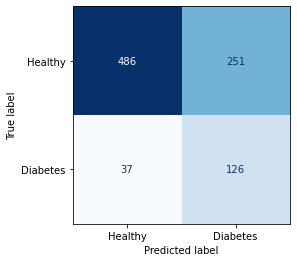

Accuracy(%) : 0.68
Sensitivity(%) : 0.773
Specificity(%) : 0.659
PPV(%) : 0.334
NPV(%): 0.929
F1_score: 0.466

SVM


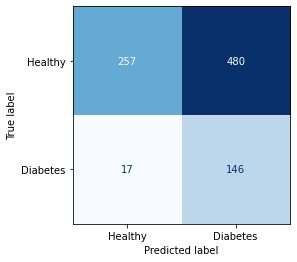

Accuracy(%) : 0.82
Sensitivity(%) : 0.018
Specificity(%) : 0.997
PPV(%) : 0.6
NPV(%): 0.821
F1_score: 0.035

QDA


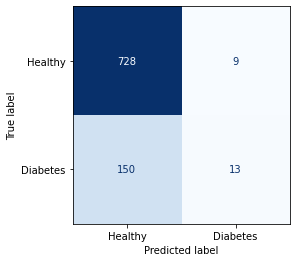

Accuracy(%) : 0.823
Sensitivity(%) : 0.08
Specificity(%) : 0.988
PPV(%) : 0.591
NPV(%): 0.829
F1_score: 0.141

NB


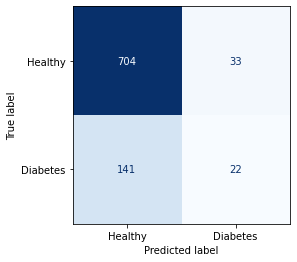

Accuracy(%) : 0.807
Sensitivity(%) : 0.135
Specificity(%) : 0.955
PPV(%) : 0.4
NPV(%): 0.833
F1_score: 0.202

RF


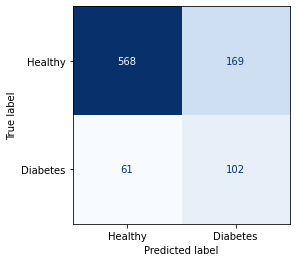

Accuracy(%) : 0.744
Sensitivity(%) : 0.626
Specificity(%) : 0.771
PPV(%) : 0.376
NPV(%): 0.903
F1_score: 0.47

ET


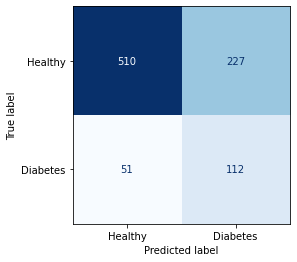

Accuracy(%) : 0.691
Sensitivity(%) : 0.687
Specificity(%) : 0.692
PPV(%) : 0.33
NPV(%): 0.909
F1_score: 0.446

xgboost


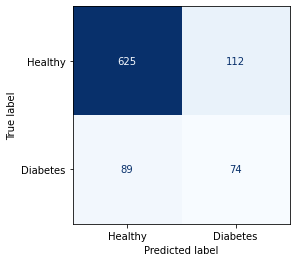

Accuracy(%) : 0.777
Sensitivity(%) : 0.454
Specificity(%) : 0.848
PPV(%) : 0.398
NPV(%): 0.875
F1_score: 0.424

lightgbm


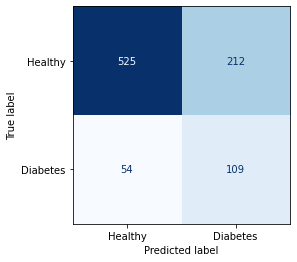

Accuracy(%) : 0.704
Sensitivity(%) : 0.669
Specificity(%) : 0.712
PPV(%) : 0.34
NPV(%): 0.907
F1_score: 0.451

Best models: 
Accuracy: QDA(0.823)
Sensitivity: logistic(0.773)
Specificity: SVM(0.997)
PPV: SVM(0.6)
NPV: logistic(0.929)
F1_score: RF(0.47)


In [29]:
print_confusion_matrix(model_dict, X_test, y_test)

## roc curve 출력 

### 개요

**ROC(Receiver Operating Characteristic) curve**는 0 ~ 1의 확률로 output이 나오는 이진분류 모델에서 Threshold를 변화시켜가며 각각의 성능을 한 그래프에 점으로 표시한 것이다.  
이때 성능은 **True Positive Rate**(당뇨 환자라고 판정내린 사람 중 실제 당뇨환자의 비율)과 **False Positive Rate**(당뇨 환자라고 판정내린 사람 중 실제로는 당뇨환자가 아닌 사람의 비율) 두 가지로 나타내는데, 각각 앞의 confusion matrix에서 설명한 **Sensitivity**, **1 - Specificity**와 같으며 각각 y축, x축에 나타낸다.  
만약 정확도 100%의 완벽한 분류 모델을 만들었다고 가정하면, 그 모델은 특정 threshold에서 True Positive Rate이 100%일 때 False Positive Rate이 0일 것이며, ROC curve를 그렸을 때 좌상단 끝에 점이 찍힐 것이고, 정확도가 100%가 아니라도 **최고 성능을 내는 threshold일 때의 성능은 최대한 좌상단에 가깝게 찍힐 것이다.**     
이때 threshold를 해당지점보다 점차 줄이면 모델 자체가 환자라고 판정하는 기준이 낮아지는 것이기 때문에 True positive rate이 더 떨어질 수는 없고, False positive rate이 점차 증가한다.  
반대로 threshold를 최고 성능 지점에서 점점 늘리면 환자라고 판정하는 기준이 높아지는 것이기 때문에 False positive rate이 떨어질 수는 없는 반면 True positive rate이 점점 증가한다.  
따라서 ROC curve로 나타낸 모델이 성능이 더 좋을수록 roc curve는 좌상단에 붙게 되는 것이고, 이를 이용해 우리는 **roc 커브의 아랫면적을 모델 성능평가 지표로 사용할 수 있다.**  
  
또한 앞서 만들었던 confusion matrix는 임의로 설정한 threshold를 사용해 나온 결과값 한 개를 사용해 산출하지만, roc 커브는 threshold를 변형시켜가며 탐색하는 그래프이기 때문에 최적의 threshold를 탐색하지 않은 상황에서도 성능을 비교할 수 있다는 장점이 있다.  

![d](img/roc_curve.png)  

In [30]:
# from sklearn.metrics import roc_auc
def print_roc_auc_curve(model_dict, y_test):   
    colors = ['blue','orange','green','red','purple','brown','pink','gray','olive']
    def roc_curve_and_score(y_test, pred_proba): # AUC CURVE
        fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel(), pos_label=1)
        roc_auc = auc(fpr,tpr)
        return fpr, tpr, roc_auc
    

        

        
    # ROC_AUC
    plt.figure(figsize=(20, 6))
    plt.subplot(121)

    for i,color in zip(range(len(list(model_dict))),colors):
        fpr, tpr, roc_auc = roc_curve_and_score(y_test, model_dict[list(model_dict)[i]]['y_pred'])
        plt.plot(fpr, tpr, color=color, lw=2,
                 # marker='^',
                 label='{0} ({1:.3f})'.format(list(model_dict)[i] ,roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.title('ROC')
    plt.legend(fontsize=9,loc="best")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')
    plt.show()
            


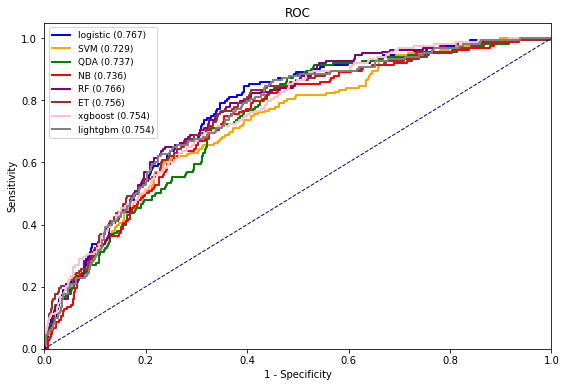

In [31]:
print_roc_auc_curve(model_dict, y_test)

## precision_recall curve 출력  

### 개요

**Precision recall curve**는 모델 결과에서 threshol를 변화시켜가며 앞서 4.1 confusion matrix에서 설명했던 PPV(precision)과 Sensitivity(recall)을 각각 축으로하여 성능을 표시한 그래프다.  
roc curve와 마찬가지로 trade-off 관계를 가진 두 지표를 양 축으로 갖기 때문에 면적을 통해 성능을 평가할때 사용할 수 있다.  
축으로 사용하는 지표가 f1-score와 같아 **label이 불균형한 데이터를 사용한 결과를 측정할 때 강력**하다는 공통적인 특징을 갖으며,  
특히 True label (환자)를 True로 예측하는 것이 중요한 경우에 가장 잘 알맞는다.  

In [32]:
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import roc_auc
def print_precision_recall_curve(model_dict, y_test):   
    colors = ['blue','orange','green','red','purple','brown','pink','gray','olive']
    # ROC_AUC
    plt.figure(figsize=(20, 6))
    plt.subplot(121)

    for i,color in zip(range(len(list(model_dict))),colors):
        precision, recall, _ = precision_recall_curve(y_test, model_dict[list(model_dict)[i]]['y_pred'])
        plt.plot(recall, precision, 
                 label='{0} ({1:.3f})'.format(list(model_dict)[i] ,auc(recall, precision)), 
                 # marker='^',
                 lw=2, color=color) 
        plt.xlim([0.02, 0.99])
        plt.ylim([0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision Recall curve')
        plt.rcParams['axes.facecolor']='white'
        plt.legend(fontsize=9,loc="best")
    plt.show()
            


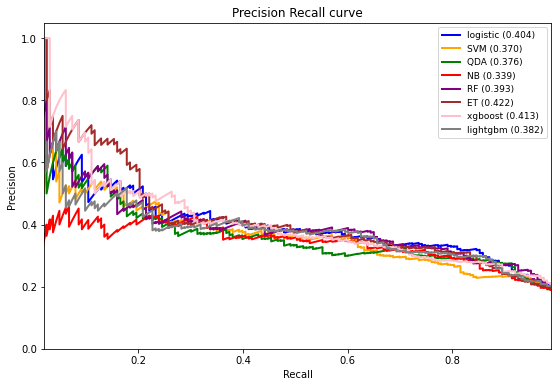

In [33]:
print_precision_recall_curve(model_dict, y_test)